## Callin Switzer
- Update 15 Dec 2018
- Make Supplemental Figure to show accelerometer recording 
- and spectrum

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import os
import csv
import time

In [2]:
fle = os.path.join(os.path.dirname(os.getcwd()), "data", "RawAccelRecording.txt")
exx = np.transpose(pd.read_csv(fle, sep = " ", header = None))

In [3]:
exx.head()

,0,1
0,0.000000,-0.014654
1,0.000005,-0.015952
2,0.000010,-0.015628
3,0.000015,-0.014654
4,0.000020,-0.015303


In [4]:
len(exx)

20000

In [5]:
# convert data to m/s/s
data = np.array(exx.loc[:,1])*1000 / 10.17
data = data - np.mean(data)

log_rate = 200000.0

n =len(data) # length of the signal
k = np.arange(n, step = 1)
T = n/log_rate
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range

Y = np.fft.fft(data)/n * 2# fft computing and normalization
Y = Y[range(int(n/2))]

# calculate top frequency
ind = np.argpartition(abs(Y), -4)[-4:]
# Find highest point on the spectrum
peakFrq = frq[ind[::-1]]
pwr = (abs(Y)[ind[::-1]])
domPK = [x for (y,x) in sorted(zip(pwr,peakFrq), reverse = True)][0]

beeFrqPwr = pwr[peakFrq == domPK]

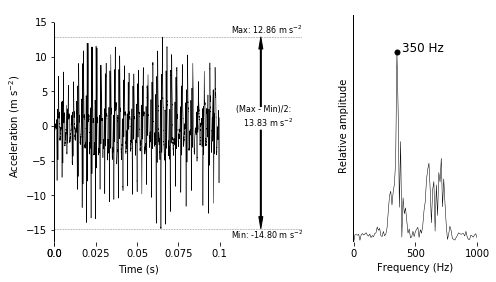

In [6]:
plt.figure(figsize=(7,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1]) 

# create subplot 1
ax1 = plt.subplot(gs[0])
#ax1.plot(smth[:,0], smth[:, 1], linestyle= ':', color = 'grey', label = "Envelope")
#ax1.plot(smth2[:,0], smth2[:, 1], linestyle= ':', color = 'grey')
#plt.legend(loc="upper center")
ax1.plot(np.array(range(len(exx)))/ float(log_rate), data,color = 'black', linewidth=0.5 )
#ax1.set_ylabel("Acceleration (m s$^{-2})$")
ax1.set_ylabel("Acceleration (m s$^{-2})$")
ax1.set_xlabel("Time (s)")
ax1.set_frame_on(False)
ax1.axhline(y=np.max(data), color='grey', linestyle='--', linewidth = 0.5)
ax1.axhline(y=np.min(data), color='grey', linestyle='--', linewidth = 0.5)
ax1.set_xlim(-0.0002, 0.15)
ax1.set_ylim(-0.17*1000 / 10.19, 0.17*1000 / 10.19)

ax1.annotate(' ', xy=(0.125, np.min(data)), xytext=(0.125, -0.00),
            arrowprops=dict(facecolor='black', width = 1, headwidth = 4)
            )
ax1.annotate(' ', xy=(0.125, np.max(data)), xytext=(0.125, 0.014*1000 / 10.19),
            arrowprops=dict(facecolor='black', width = 1, headwidth = 4)
            )

ax1.annotate('(Max - Min)/2:\n   13.83 m s$^{-2}$', xy=(0.11, np.min(data)), xytext=(0.110, 0), 
             size=8
            )

ax1.annotate('Max: 12.86 m s$^{-2}$', xy=(0.11, np.min(data)), xytext=(0.107, np.max(data) + 0.1*np.std(data)), 
             size=8
            )
""
ax1.annotate('Min: -14.80 m s$^{-2}$', xy=(0.11, np.min(data)), xytext=(0.107, np.min(data) - 0.35*np.std(data)), 
             size=8
            )

ax1.plot([0,0.1], [ax1.get_ylim()[0], ax1.get_ylim()[0]], 'black', linewidth = 1)
ax1.plot([ax1.get_xlim()[0],ax1.get_xlim()[0]], [ax1.get_ylim()[0], 0.152*1000 / 10.19], 'black', linewidth = 1)
# add "L" shaped borders
#ax1.axvline(x = ax1.get_xlim()[0], linewidth = 1, color = 'black')
#ax1.axhline(y = ax1.get_ylim()[0], linewidth = 1, color = 'black')
ax1.axes.xaxis.set_ticklabels([0.000, 0.000,  0.025, 0.05, 0.075, 0.100])
ax1.axes.xaxis.set_ticks([0.000, 0.000,  0.025, 0.05, 0.075, 0.100])
ax1.xaxis.set_label_coords(0.342, -0.1)


def get_axis_limits(ax, scale=.98):
    return ax.get_xlim()[0] + np.diff(ax.get_xlim())*0.05, ax.get_ylim()[1]*scale     

# create subplot 2
ax2 = plt.subplot(gs[1])
ax2.plot(frq,abs(Y), color = "black", linewidth=0.5)
ax2.plot(domPK, beeFrqPwr,'o', color = 'black', markersize = 5)
ax2.annotate('350 Hz', xy=(domPK, beeFrqPwr), xytext=(domPK + 40, beeFrqPwr- 0.0001), size = 12
            )
ax2.set_xlim(-3, 1003)
ax2.set_ylabel('Relative amplitude')
ax2.set_xlabel('Frequency (Hz)')
plt.tight_layout()
ax2.set_frame_on(False)
ax2.axes.yaxis.set_ticklabels([])
ax2.axes.yaxis.set_ticks([])
ax2.set_ylim(0, 0.013*1000 / 10.19*2)

#### add "L" shaped borders
ax2.plot([ax2.get_xlim()[0],ax2.get_xlim()[0]], [ax2.get_ylim()[0], 0.0127*1000 / 10.17*2], 'black', linewidth = 1)
ax2.plot([0,1500], [ax2.get_ylim()[0], ax2.get_ylim()[0]], 'black', linewidth = 1)


saveFileName = os.path.join(os.path.dirname(os.getcwd()), "figures", "exampleSpectrum.pdf")
plt.savefig(saveFileName, width = 7, height = 1.5)

plt.show()


In [7]:
# print system info
import IPython
print(IPython.sys_info())

{'commit_hash': 'dd83a2163',
 'commit_source': 'installation',
 'default_encoding': '1252',
 'ipython_path': 'C:\\Users\\calli\\Anaconda3\\envs\\timeseries_learn_gpu\\lib\\site-packages\\IPython',
 'ipython_version': '6.5.0',
 'os_name': 'nt',
 'platform': 'Windows-10-10.0.17134-SP0',
 'sys_executable': 'C:\\Users\\calli\\Anaconda3\\envs\\timeseries_learn_gpu\\python.exe',
 'sys_platform': 'win32',
 'sys_version': '3.6.6 | packaged by conda-forge | (default, Jul 26 2018, '
                '11:48:23) [MSC v.1900 64 bit (AMD64)]'}


In [8]:
# convert to html
!jupyter nbconvert --to html 008_ExampleFigureSpectrum

[NbConvertApp] Converting notebook 008_ExampleFigureSpectrum.ipynb to html
[NbConvertApp] Writing 318656 bytes to 008_ExampleFigureSpectrum.html
